In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Magda\Downloads\survey lung cancer.csv")
df.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      2           2         YES  
1                    2                      2           2         YES  
2                    2                      1           2          NO  
3                    1                      2           2          NO  
4                    2                      1           1          NO

In [3]:
cols = ['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','WHEEZING','ALLERGY ','ALCOHOL CONSUMING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN','FATIGUE ','COUGHING']
df[cols] = df[cols].replace([1],0)
df[cols] = df[cols].replace([2],1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
df.shape

(309, 16)

In [8]:
#returns statistics about the numerical columns in the dataset
df.describe()

AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    0.563107        0.569579    0.498382       0.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    0.000000        0.000000    0.000000       0.000000   
25%     57.000000    0.000000        0.000000    0.000000       0.000000   
50%     62.000000    1.000000        1.000000    0.000000       1.000000   
75%     69.000000    1.000000        1.000000    1.000000       1.000000   
max     87.000000    1.000000        1.000000    1.000000       1.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          0.504854    0.673139    0.556634    0.556634           0.556634   
std           0.500787    0.469827    0.497588    0.497588           0.497588   
min           0.000000    0.000000    0.000000    0.000000           0.000000   
25%           0.000000    0.000000    0.000000    0.000000           0.000000   
50%           1.000000    1.000000    1.000000    1.000000           1.000000   
75%           1.000000    1.000000    1.000000    1.000000           1.000000   
max           1.000000    1.000000    1.000000    1.000000           1.000000   

         COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
count  309.000000           309.000000             309.000000  309.000000  
mean     0.579288             0.640777               0.469256    0.556634  
std      0.494474             0.480551               0.499863    0.497588  
min      0.000000             0.000000               0.000000    0.000000  
25%      0.000000             0.000000               0.000000    0.000000  
50%      1.000000             1.000000               0.000000    1.000000  
75%      1.000000             1.000000               1.000000    1.000000  
max      1.000000             1.000000               1.000000    1.000000

In [9]:
df.duplicated().sum()

33

In [10]:
df = df.drop_duplicates()
df.shape

(276, 16)

In [11]:
df["LUNG_CANCER"].unique()

array(['YES', 'NO'], dtype=object)

In [12]:
df["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [13]:
# Mapping numeric values to non-numeric values

df['GENDER'] = df['GENDER'].map({'F': 0, 'M': 1})

df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

In [14]:
#returns statistics about the numerical columns in the dataset
df.describe()

GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count  276.000000  276.000000  276.000000      276.000000  276.000000   
mean     0.514493   62.909420    0.543478        0.576087    0.496377   
std      0.500698    8.379355    0.499011        0.495075    0.500895   
min      0.000000   21.000000    0.000000        0.000000    0.000000   
25%      0.000000   57.750000    0.000000        0.000000    0.000000   
50%      1.000000   62.500000    1.000000        1.000000    0.000000   
75%      1.000000   69.000000    1.000000        1.000000    1.000000   
max      1.000000   87.000000    1.000000        1.000000    1.000000   

       PEER_PRESSURE  CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  \
count     276.000000       276.000000  276.000000  276.000000  276.000000   
mean        0.507246         0.521739    0.663043    0.547101    0.547101   
std         0.500856         0.500435    0.473529    0.498681    0.498681   
min         0.000000         0.000000    0.000000    0.000000    0.000000   
25%         0.000000         0.000000    0.000000    0.000000    0.000000   
50%         1.000000         1.000000    1.000000    1.000000    1.000000   
75%         1.000000         1.000000    1.000000    1.000000    1.000000   
max         1.000000         1.000000    1.000000    1.000000    1.000000   

       ALCOHOL CONSUMING    COUGHING  SHORTNESS OF BREATH  \
count         276.000000  276.000000           276.000000   
mean            0.550725    0.576087             0.630435   
std             0.498324    0.495075             0.483564   
min             0.000000    0.000000             0.000000   
25%             0.000000    0.000000             0.000000   
50%             1.000000    1.000000             1.000000   
75%             1.000000    1.000000             1.000000   
max             1.000000    1.000000             1.000000   

       SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
count             276.000000  276.000000   276.000000  
mean                0.467391    0.557971     0.862319  
std                 0.499842    0.497530     0.345191  
min                 0.000000    0.000000     0.000000  
25%                 0.000000    0.000000     1.000000  
50%                 0.000000    1.000000     1.000000  
75%                 1.000000    1.000000     1.000000  
max                 1.000000    1.000000     1.000000

In [15]:
df.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        0               1        1              0   
1       1   74        1               0        0              0   
2       0   59        0               0        0              1   
3       1   63        1               1        1              0   
4       0   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0         1         0         1                  1         1   
1                1         1         1         0                  0         0   
2                0         1         0         1                  0         1   
3                0         0         0         0                  1         0   
4                0         0         0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    1                      1           1            1  
1                    1                      1           1            1  
2                    1                      0           1            0  
3                    0                      1           1            0  
4                    1                      0           0            0

In [16]:
print ('Total Healthy Patients : {} '.format(df.LUNG_CANCER.value_counts()[0]))
print ('Total Suspected Patients : {} '.format(df.LUNG_CANCER.value_counts()[1]))

Total Healthy Patients : 38 
Total Suspected Patients : 238 


In [17]:
values = df['LUNG_CANCER'].value_counts().tolist()
names = list(dict(df['LUNG_CANCER'].value_counts()).keys())

px.pie(df, values=values, names=names, hole = 0.5,
       color_discrete_sequence=["firebrick", "green"])

In [18]:
x = df['LUNG_CANCER'].value_counts().index.tolist()
y = df['LUNG_CANCER'].value_counts().tolist()

fig = px.bar(x=x, y=y, color=["firebrick", "green"], color_discrete_map="identity",
             labels={
                'x': 'LUNG_CANCER',
                'y': 'count'
                },)
fig.show()

In [19]:
def custom_palette(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both', labelsize=0, length = 0)

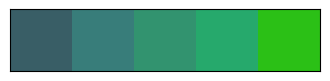

In [20]:
pal = ["#395e66","#387d7a","#32936f","#26a96c","#2bc016"]
custom_palette(pal)

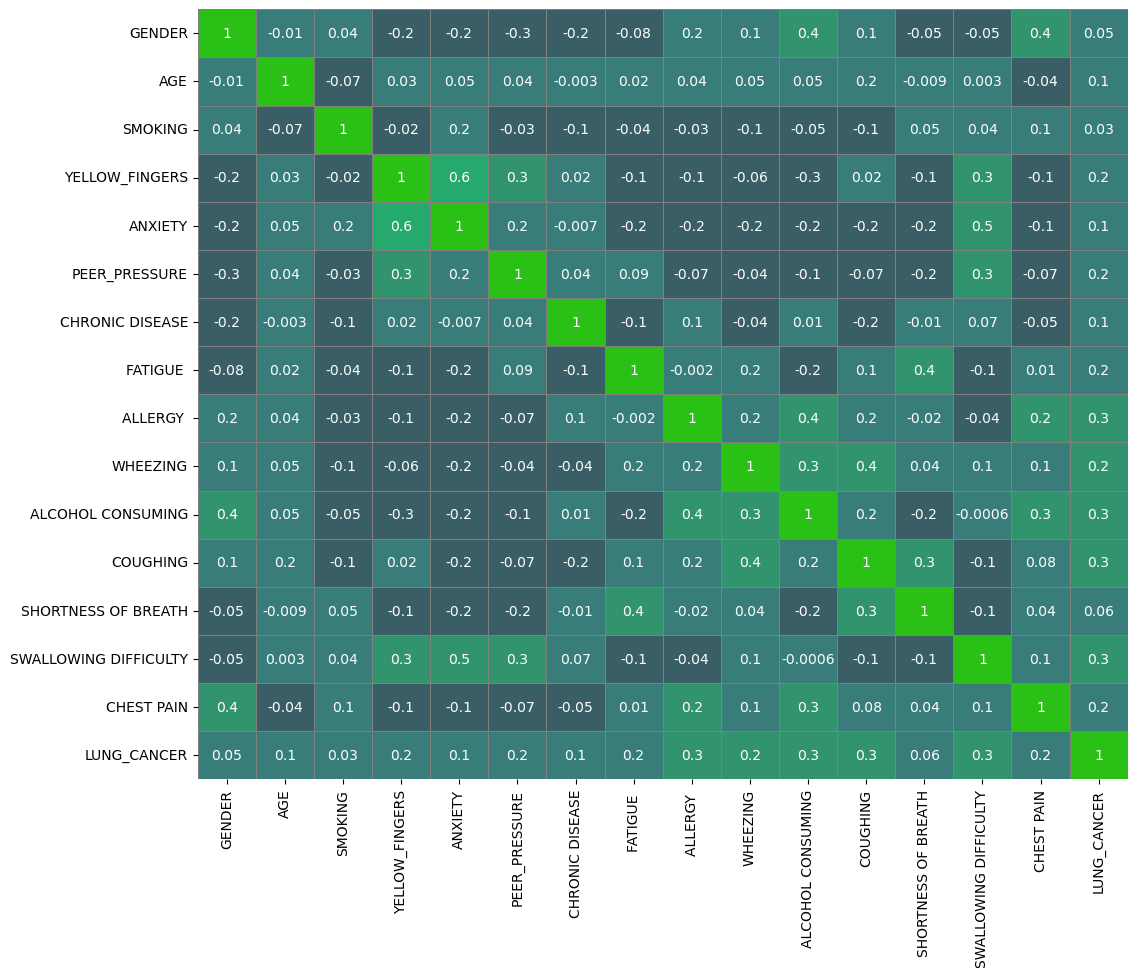

In [21]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap=pal, cbar=False, linewidths=0.5, linecolor='grey');

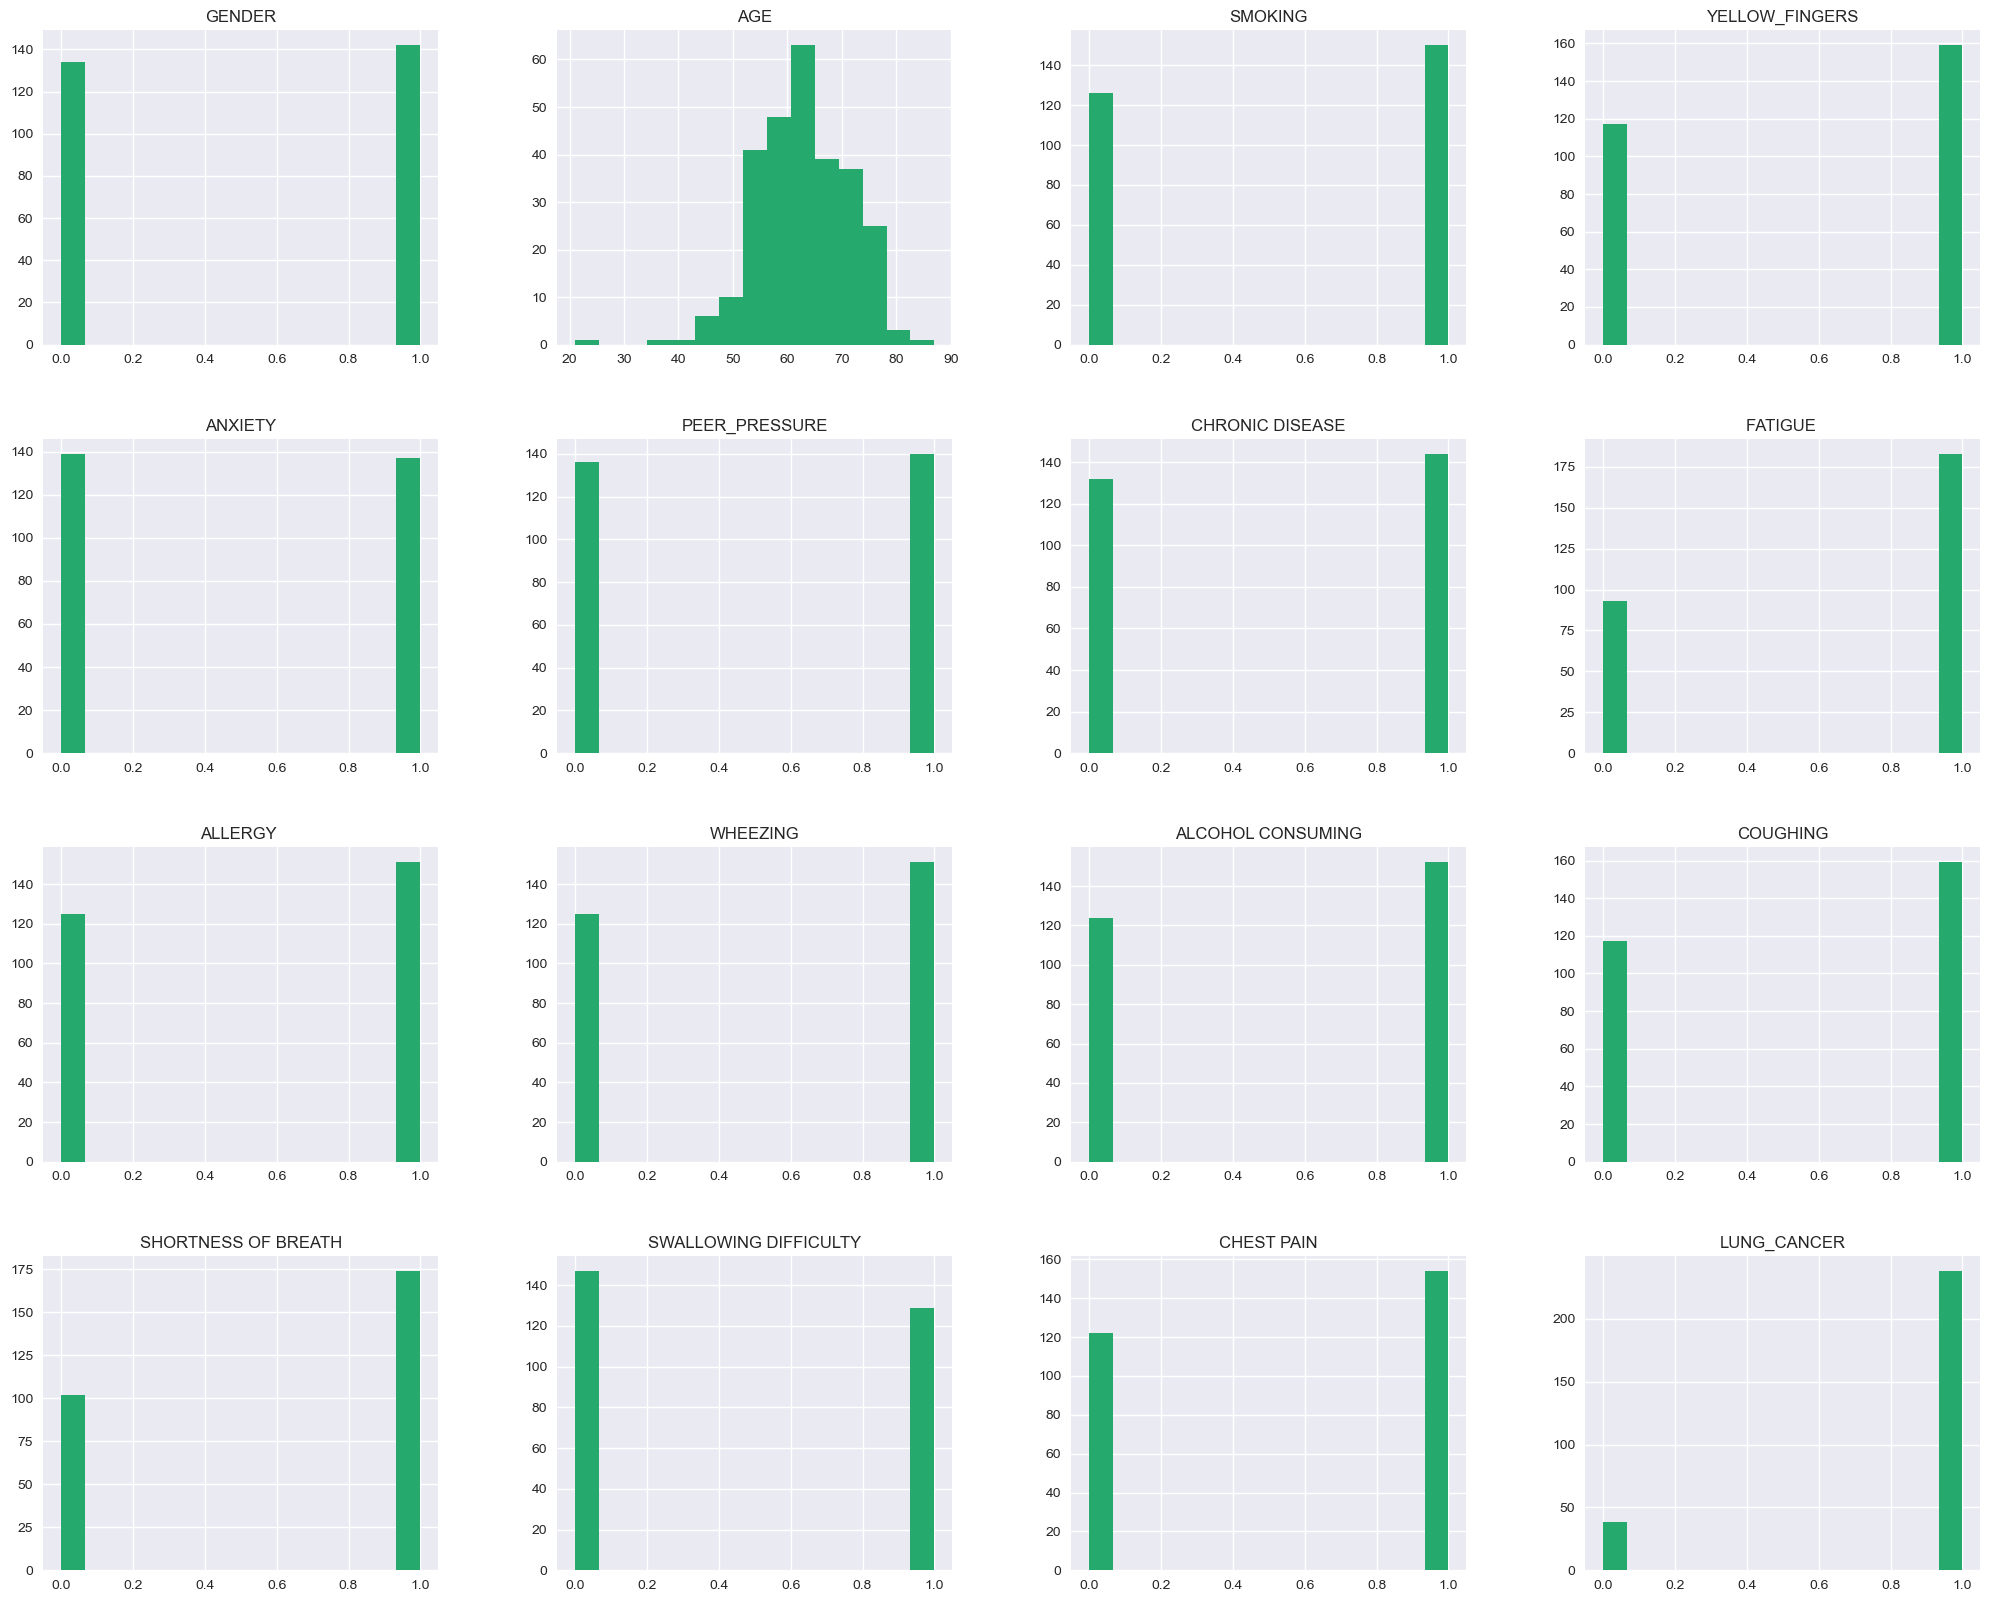

In [22]:
plt.style.use("seaborn")
df.hist(figsize=(25,20), color=pal[3], bins=15);

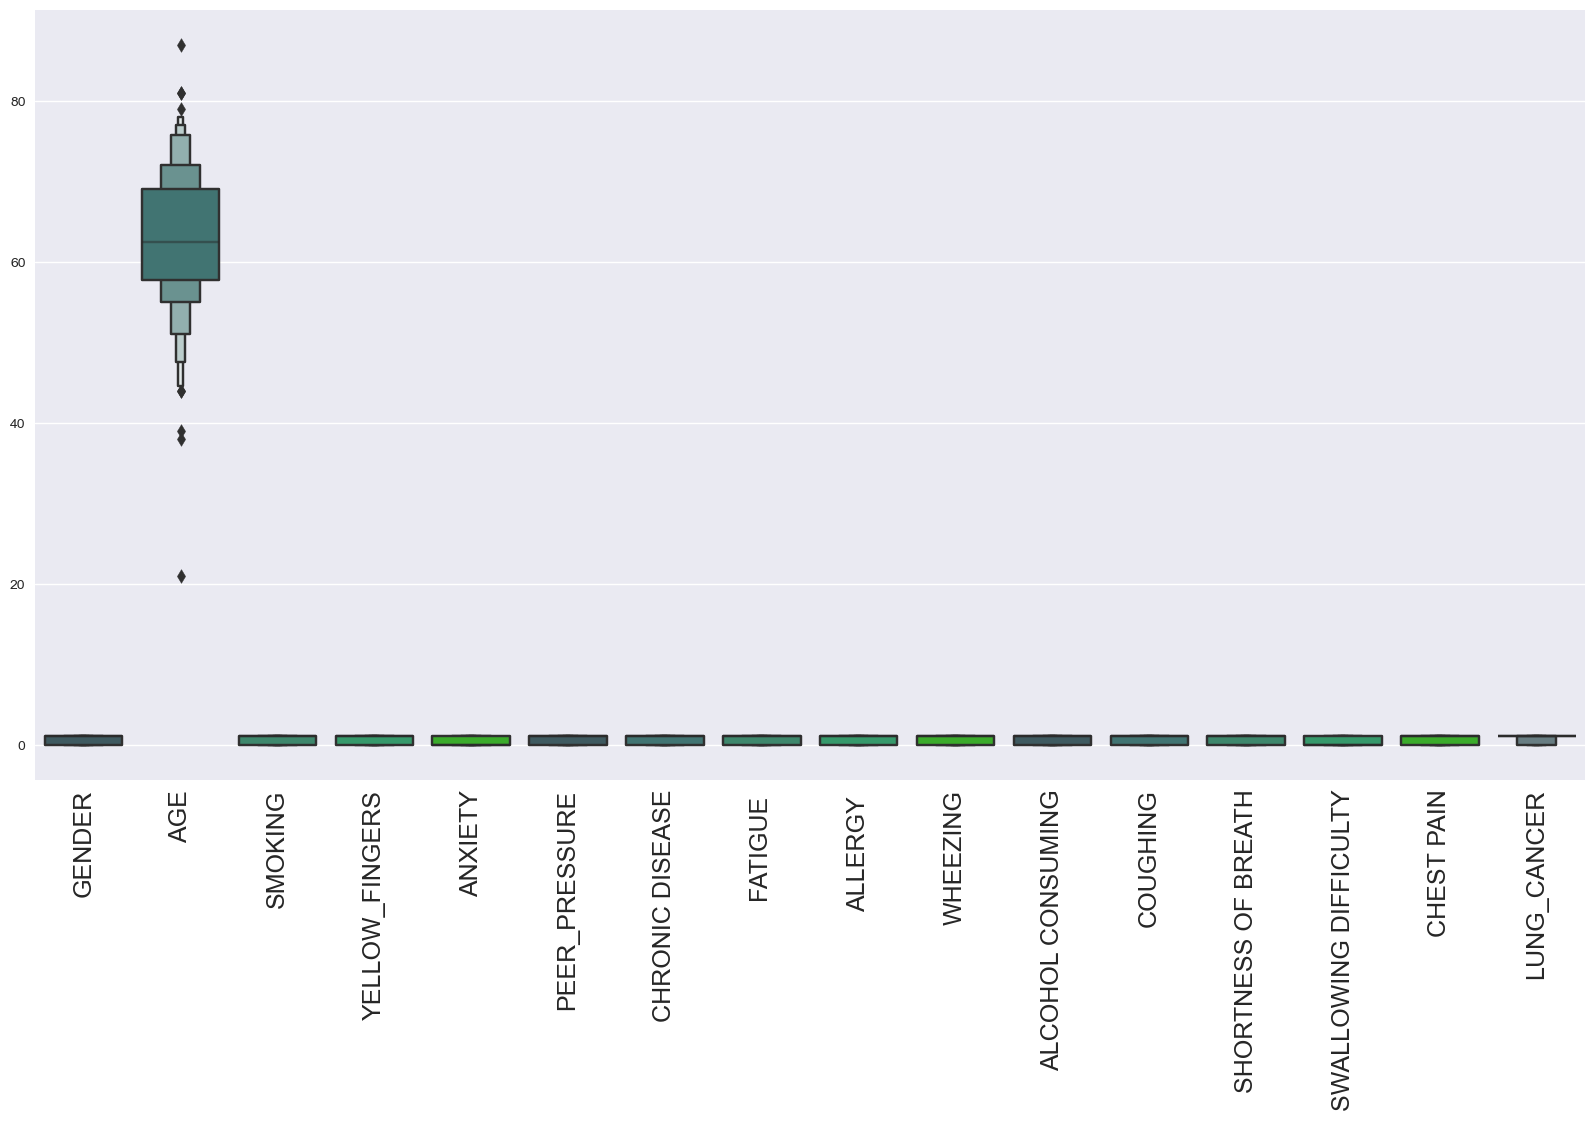

In [23]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = df, palette = pal)
plt.xticks(rotation=90, fontsize=18)
plt.show()

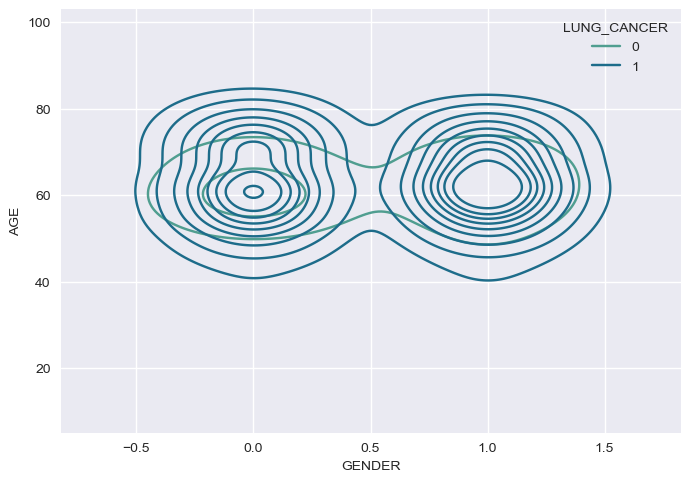

In [24]:
sns.kdeplot(x=df["GENDER"], y=df["AGE"], hue =df["LUNG_CANCER"], palette="crest");
plt.show()

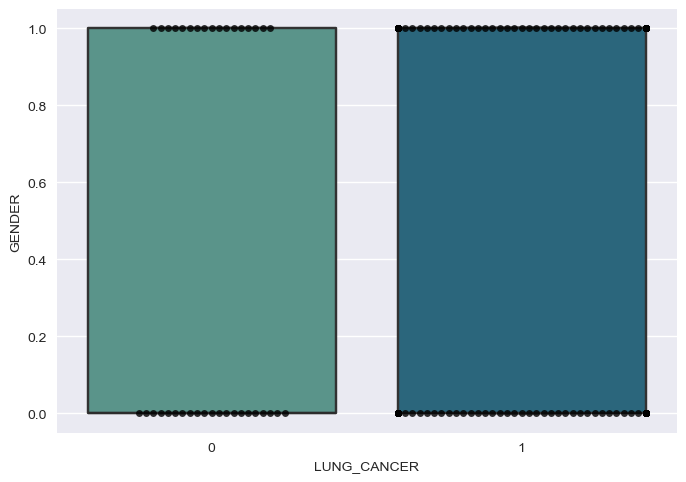

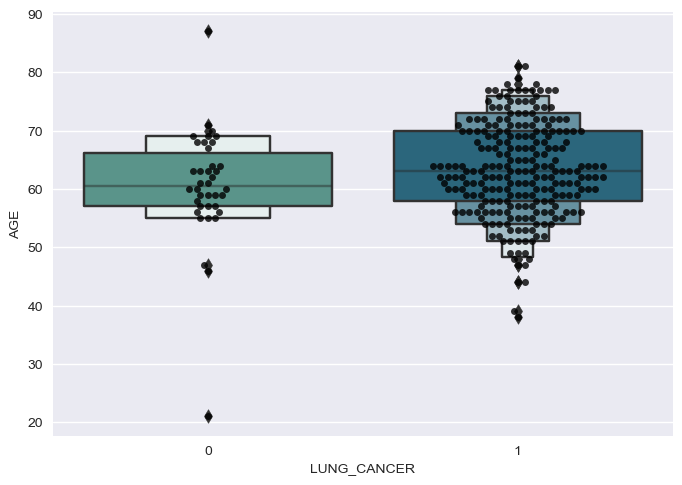

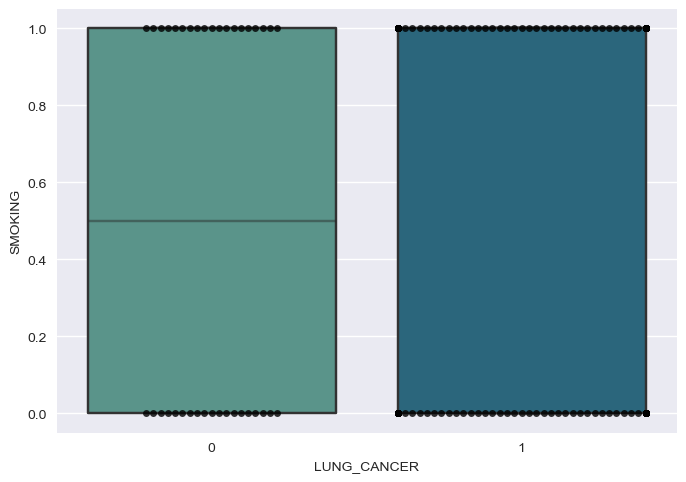

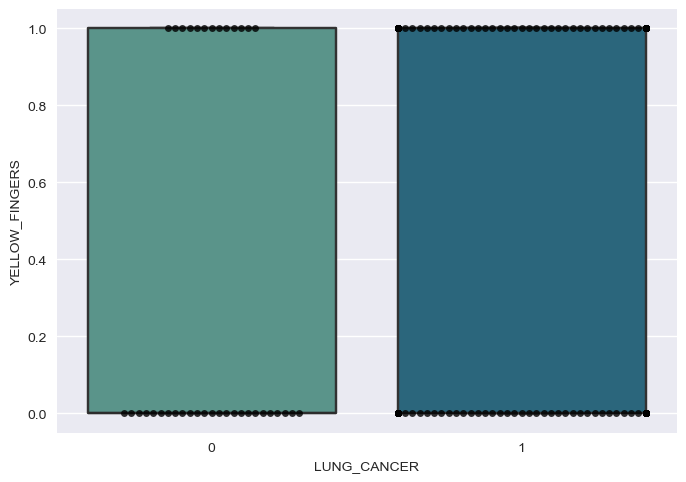

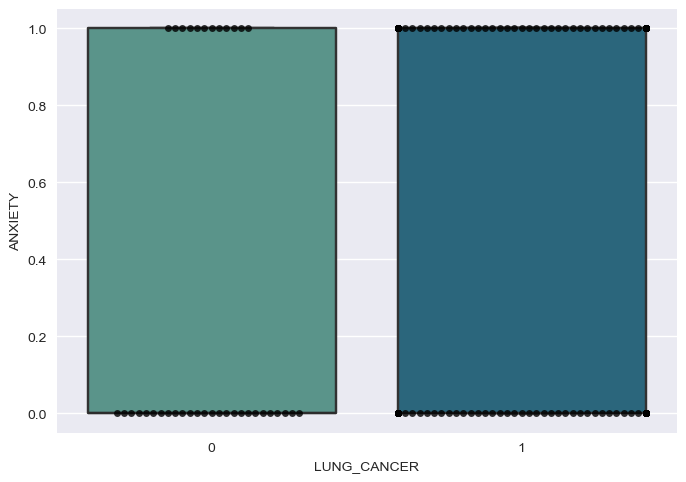

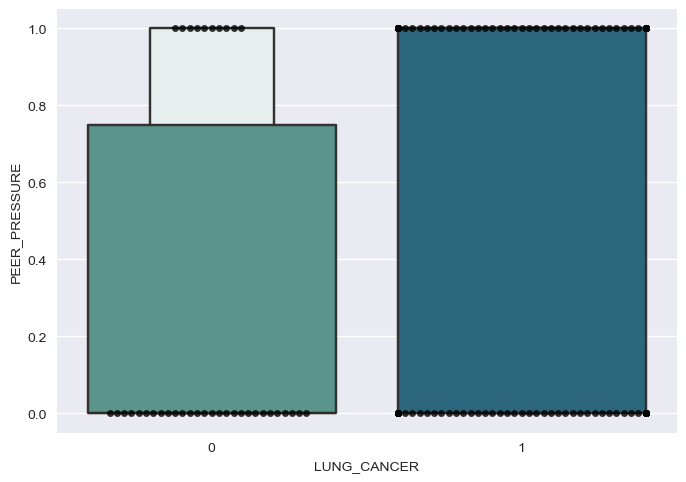

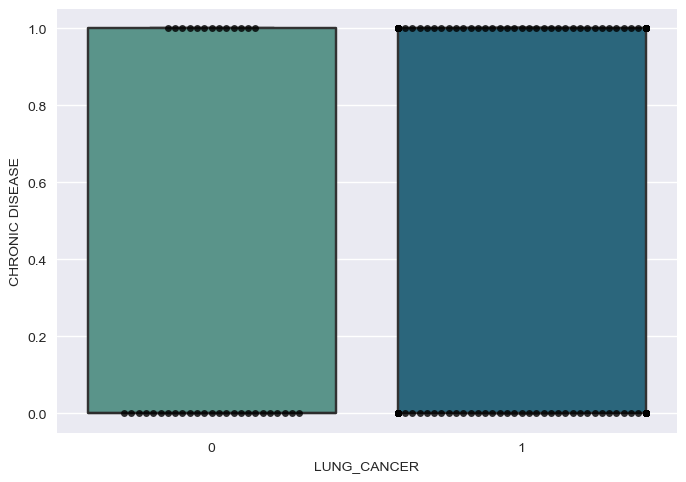

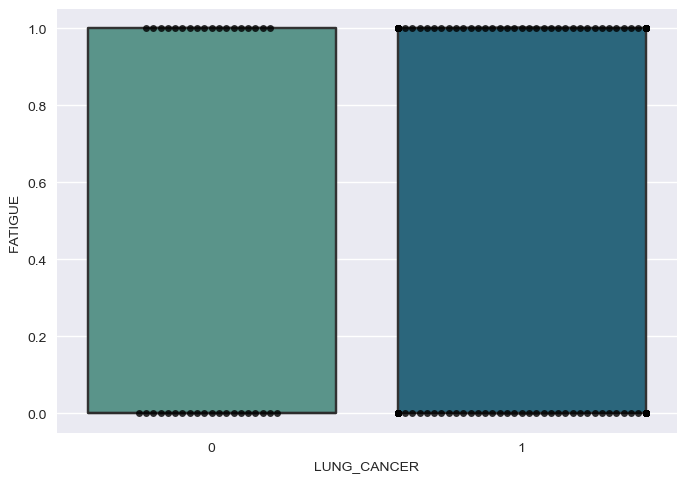

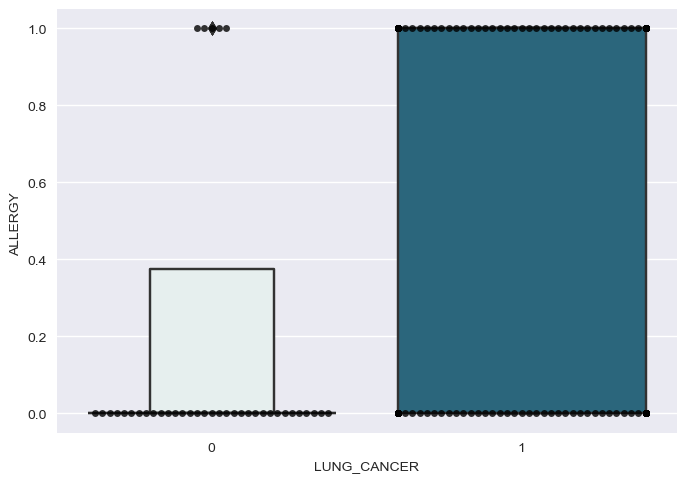

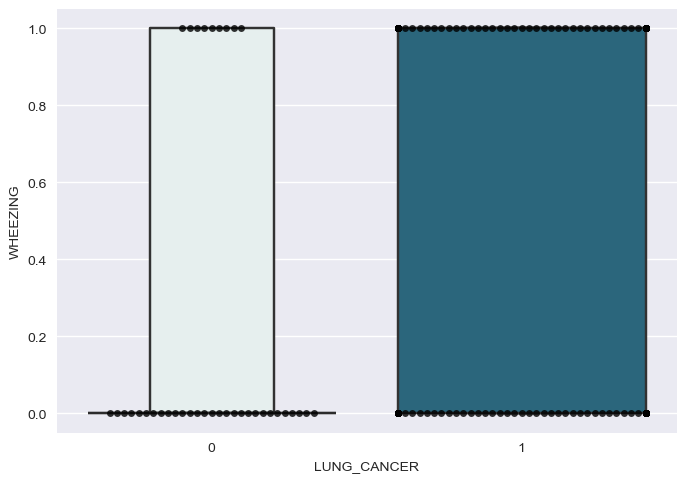

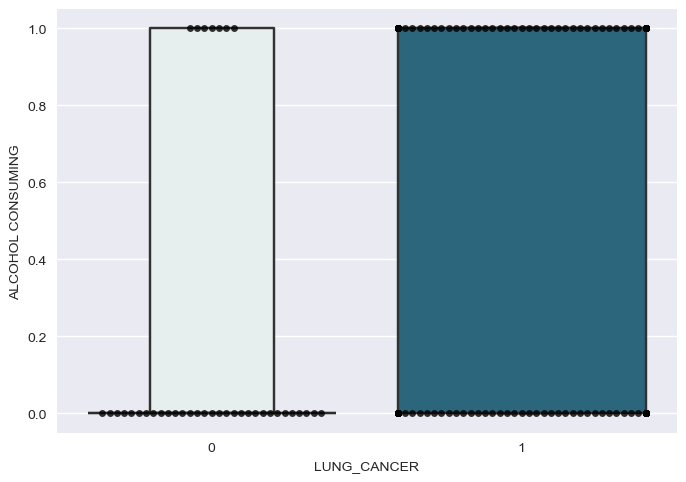

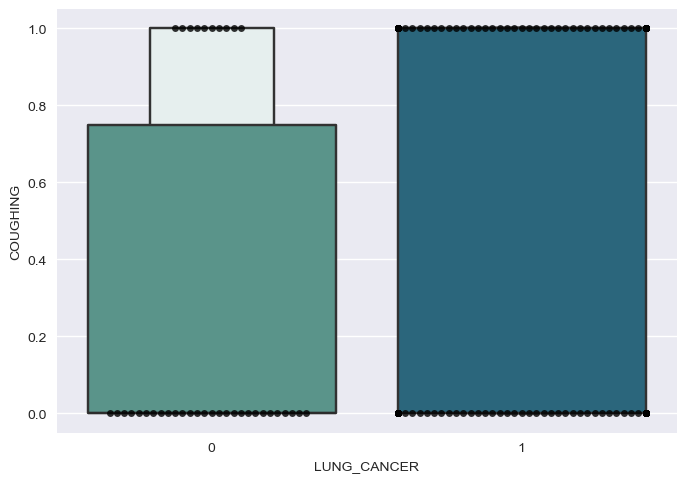

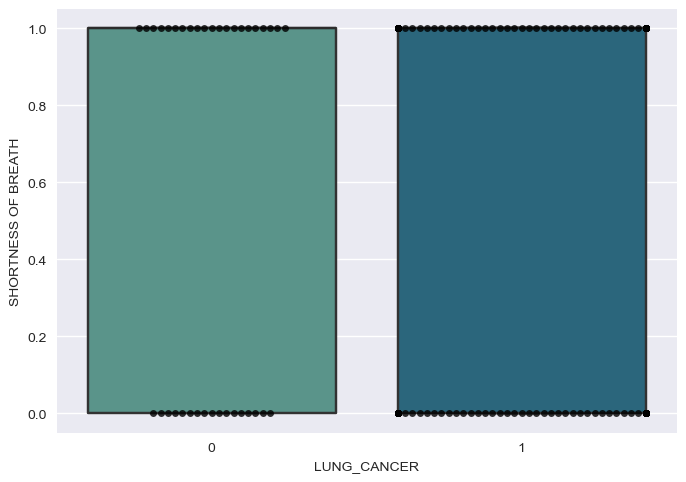

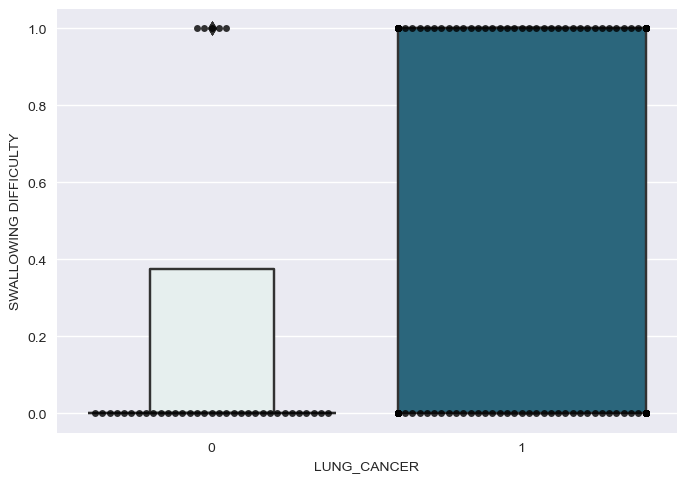

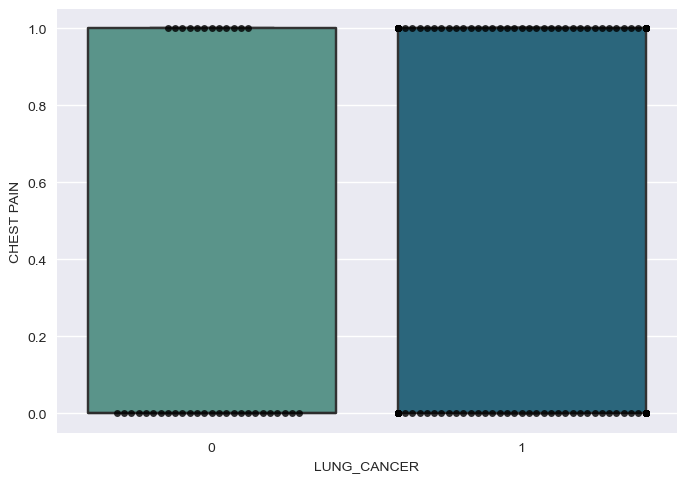

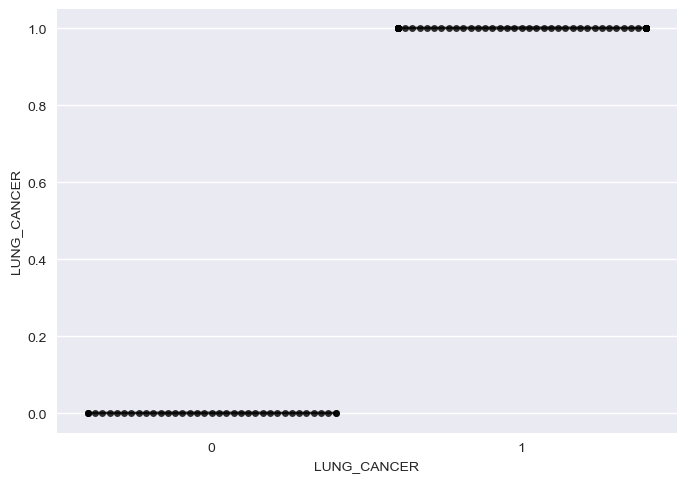

In [25]:
for i in df:
    sns.swarmplot(x = df["LUNG_CANCER"], y = df[i], color = "black", alpha = 0.8)
    sns.boxenplot(x = df["LUNG_CANCER"], y = df[i], palette="crest")
    plt.show()   

<Axes: xlabel='SMOKING', ylabel='Density'>

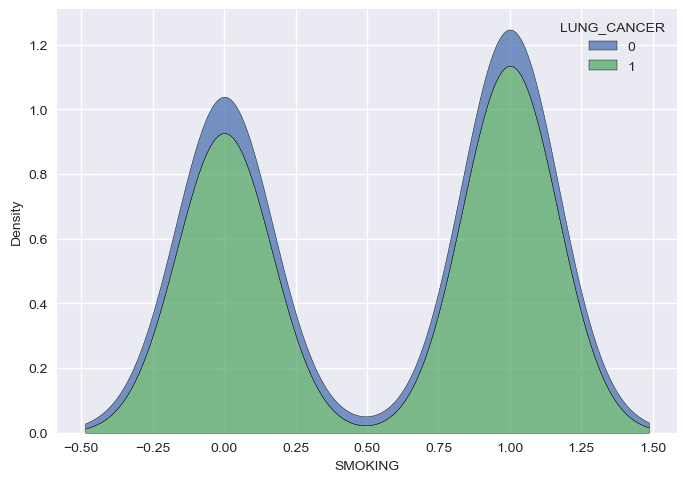

In [26]:
sns.kdeplot(data=df, x="SMOKING", hue="LUNG_CANCER", multiple="stack")

<Axes: xlabel='WHEEZING', ylabel='Density'>

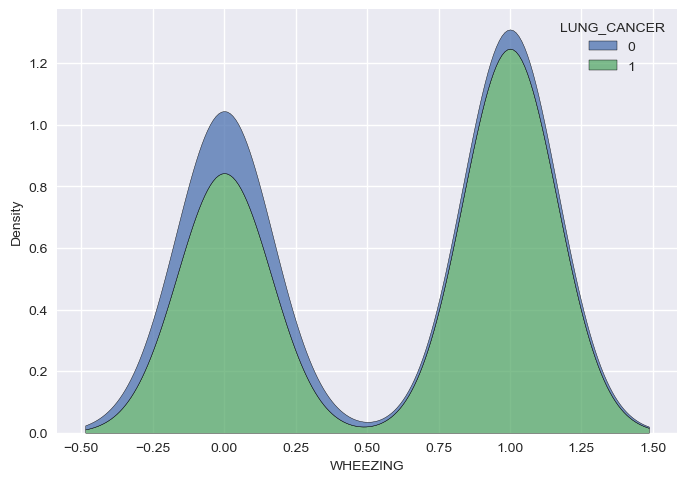

In [27]:
sns.kdeplot(data=df, x="WHEEZING", hue="LUNG_CANCER", multiple="stack")

<Axes: xlabel='ALCOHOL CONSUMING', ylabel='Density'>

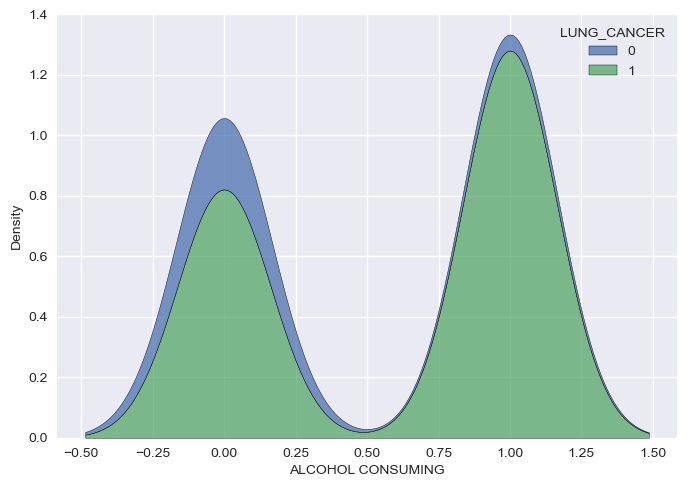

In [28]:
sns.kdeplot(data=df, x="ALCOHOL CONSUMING", hue="LUNG_CANCER", multiple="stack")

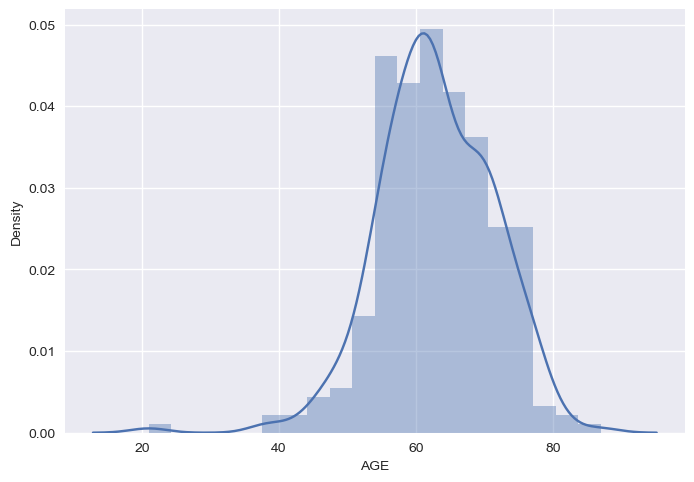

In [29]:
sns.distplot(a=df["AGE"]);

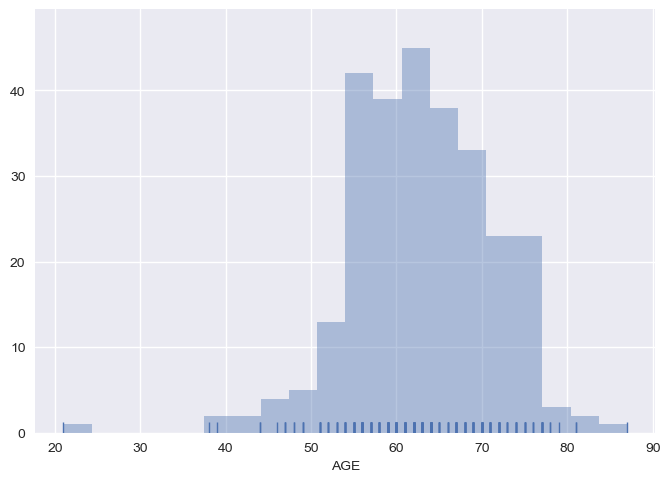

In [30]:
sns.distplot(df["AGE"], kde=False, rug=True);

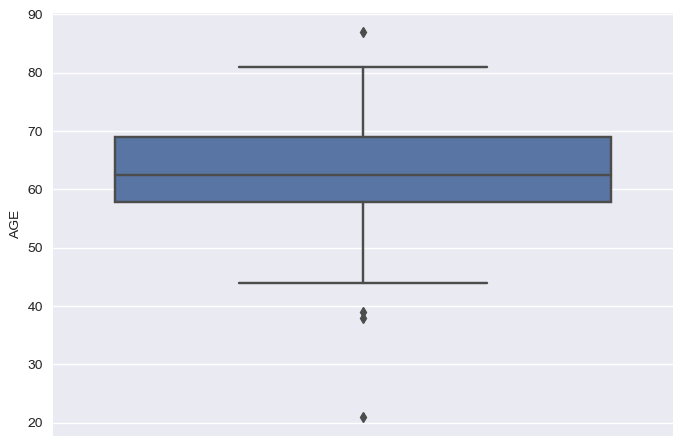

In [31]:
sns.boxplot(y = 'AGE', data = df);

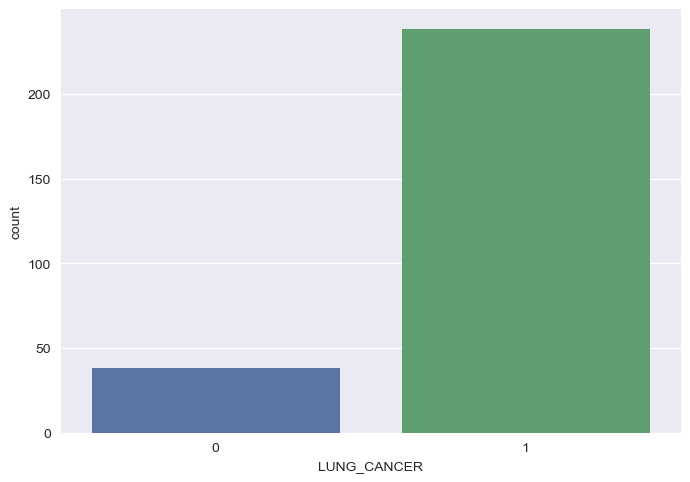

In [32]:
sns.countplot(x="LUNG_CANCER", data=df);

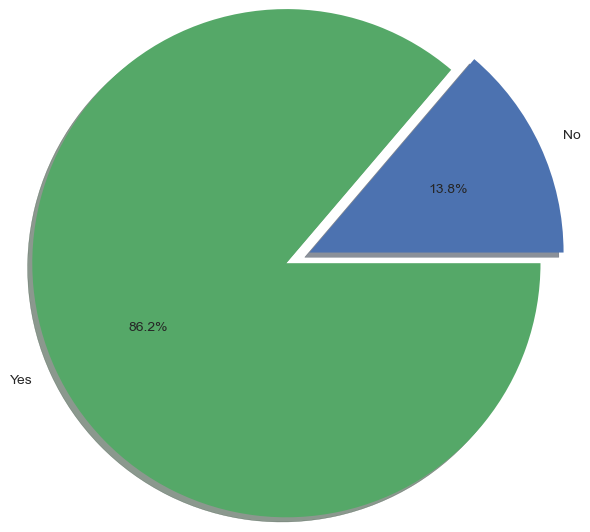

In [33]:
r = df.groupby('LUNG_CANCER')['LUNG_CANCER'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True);

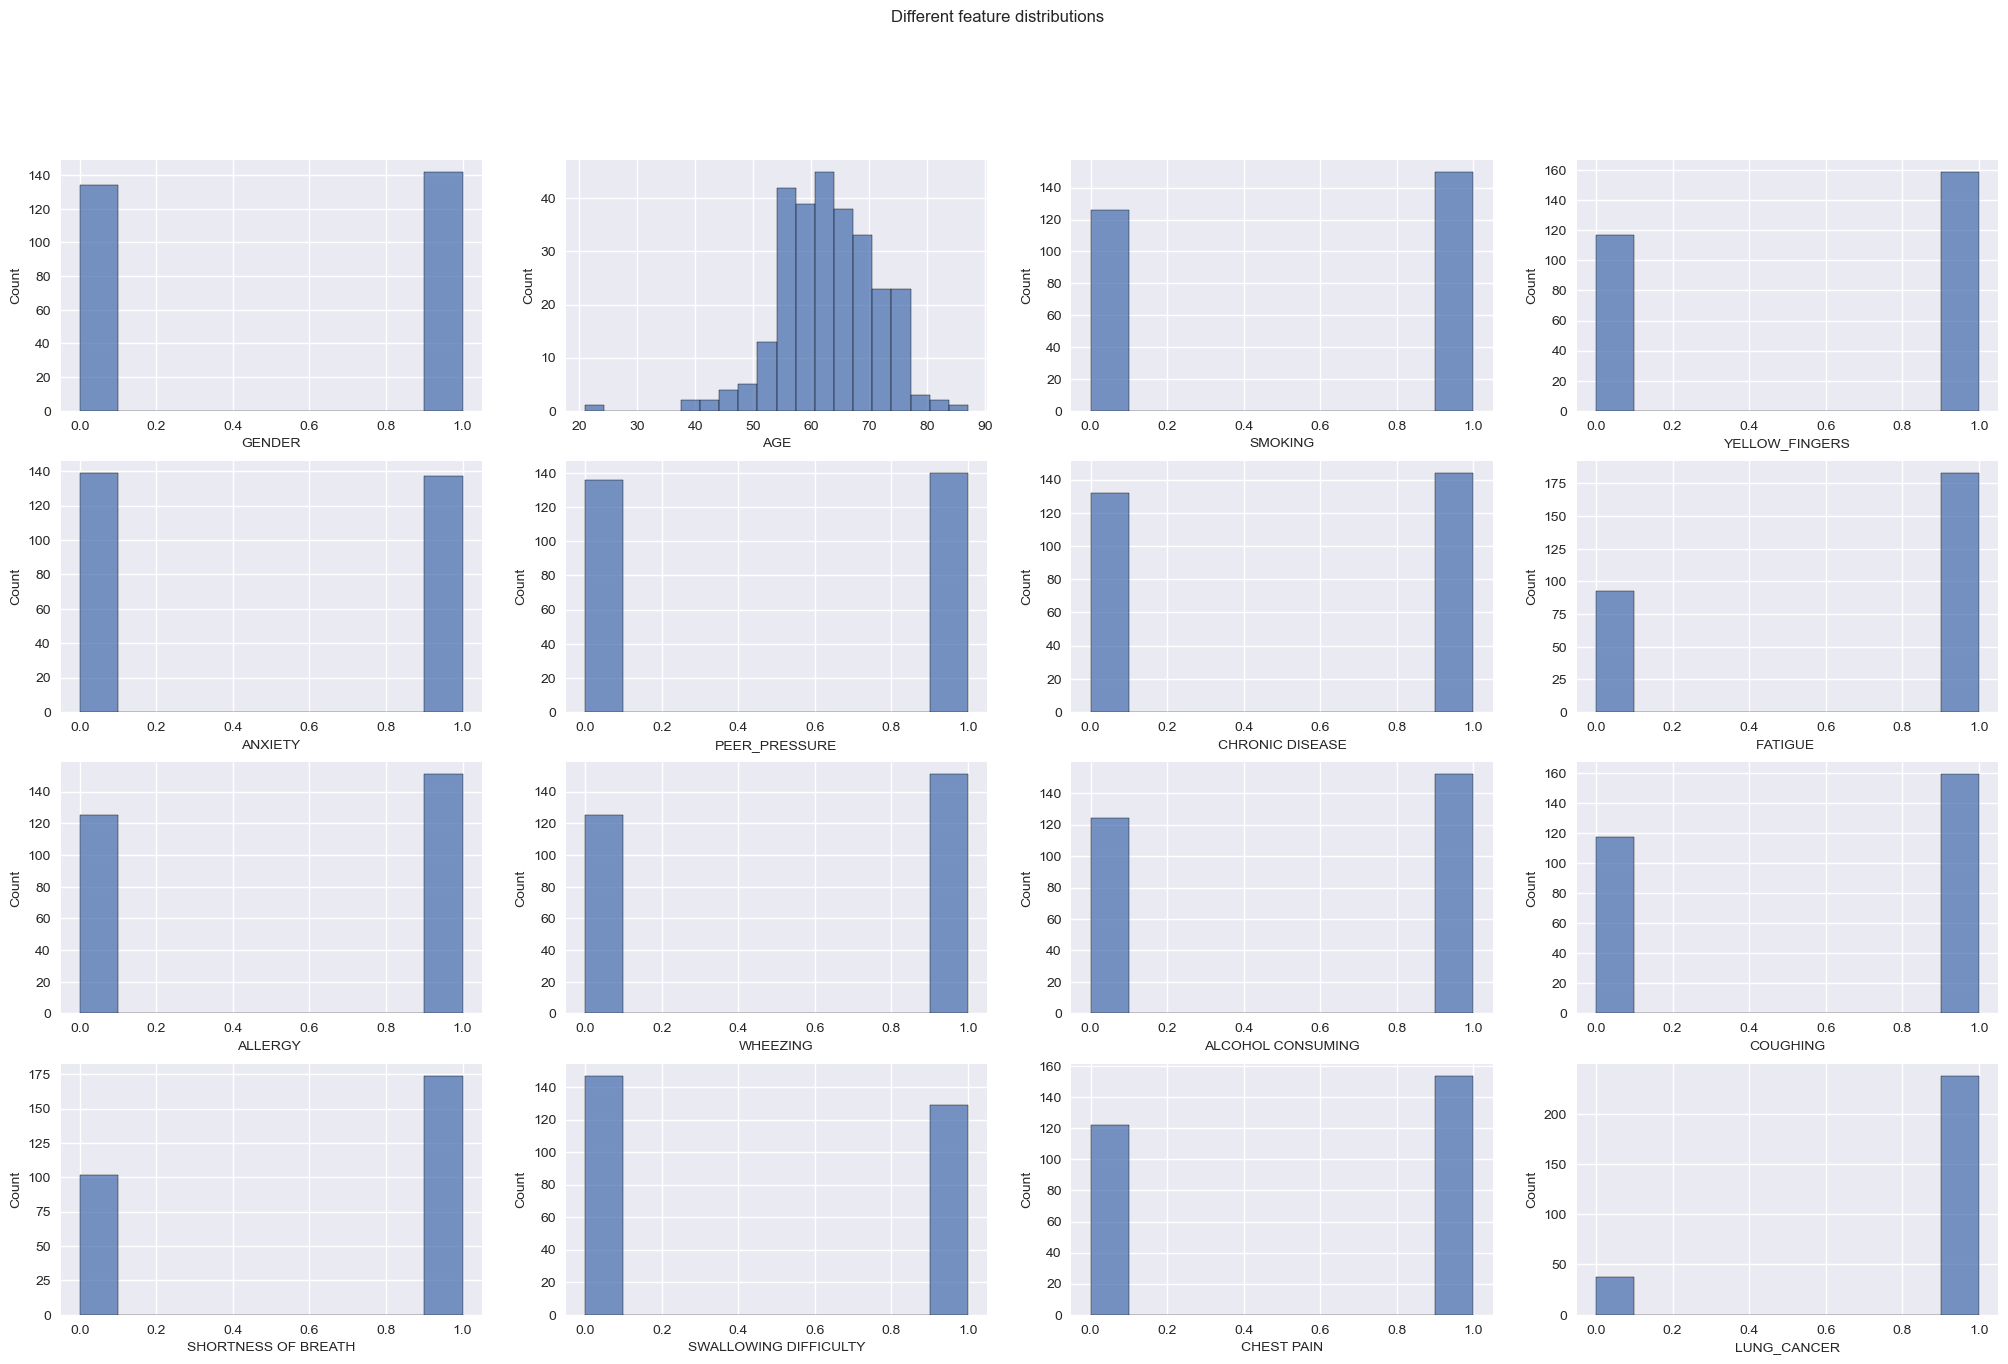

In [34]:
fig, axes = plt.subplots(4, 4, figsize=(25, 15))
fig.suptitle('Different feature distributions')

axes = axes.reshape(16,)

for i,column in enumerate(df.columns):
    sns.histplot(ax = axes[i],data = df, x= column)

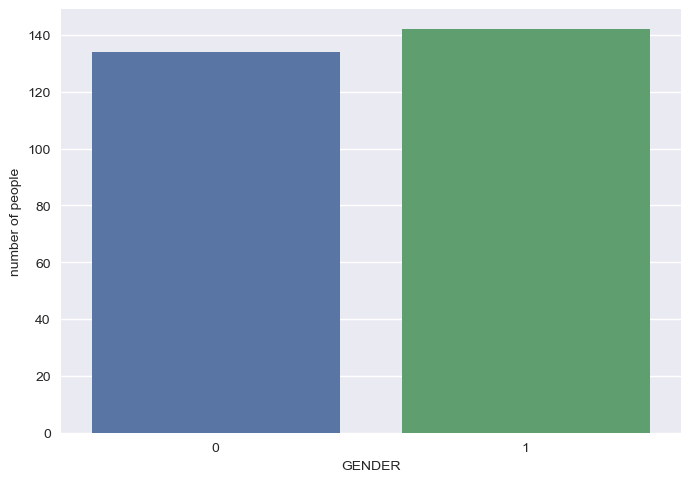

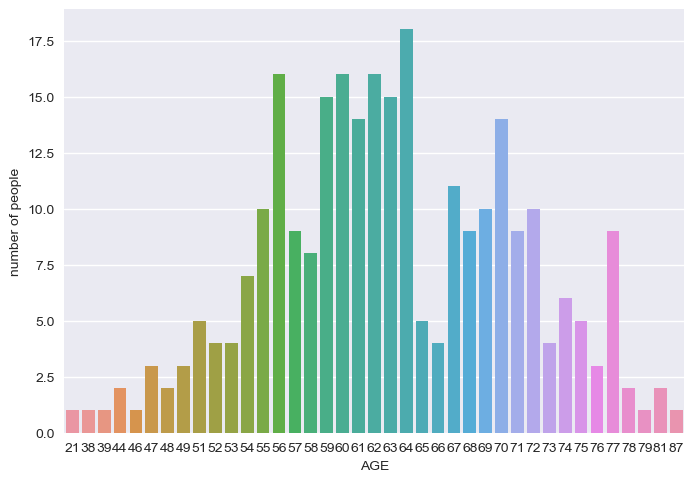

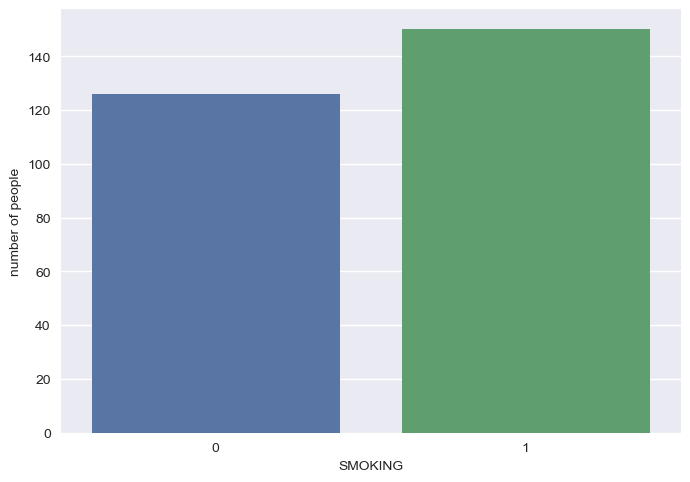

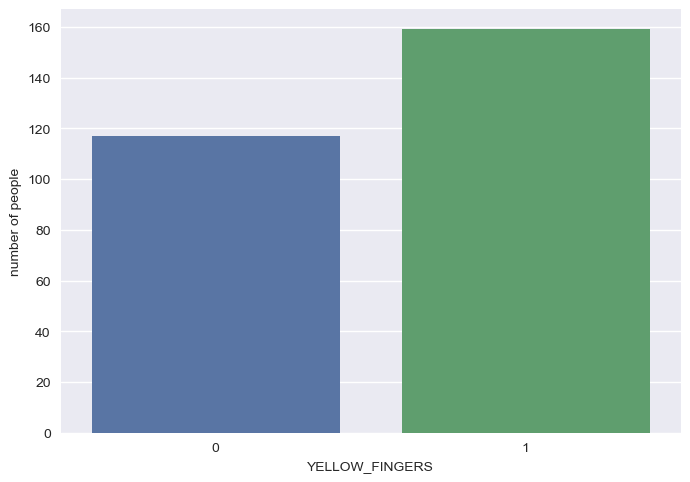

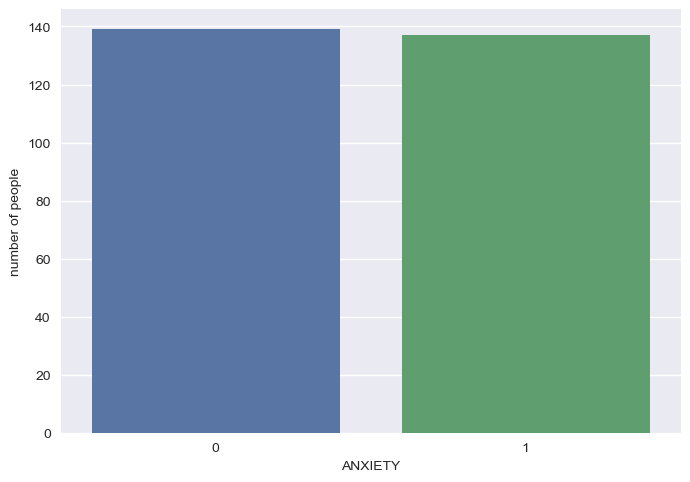

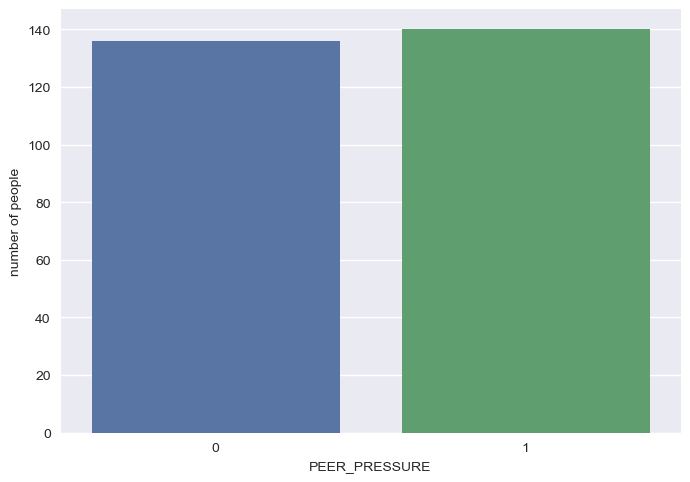

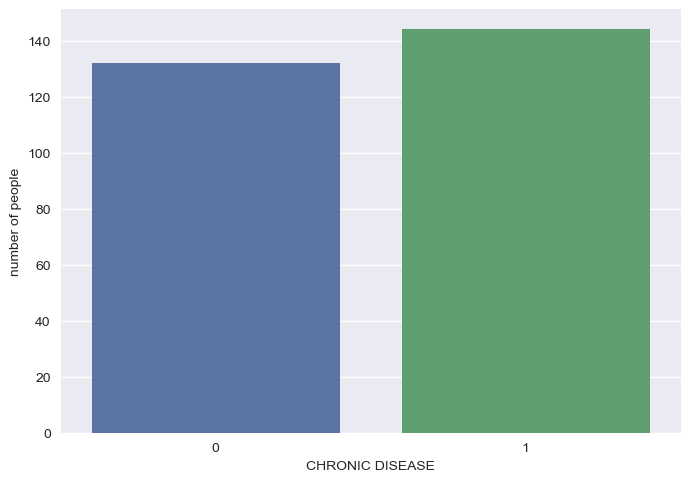

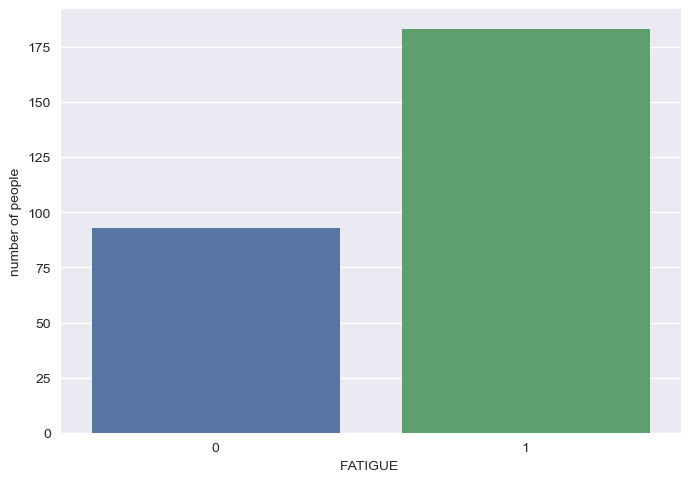

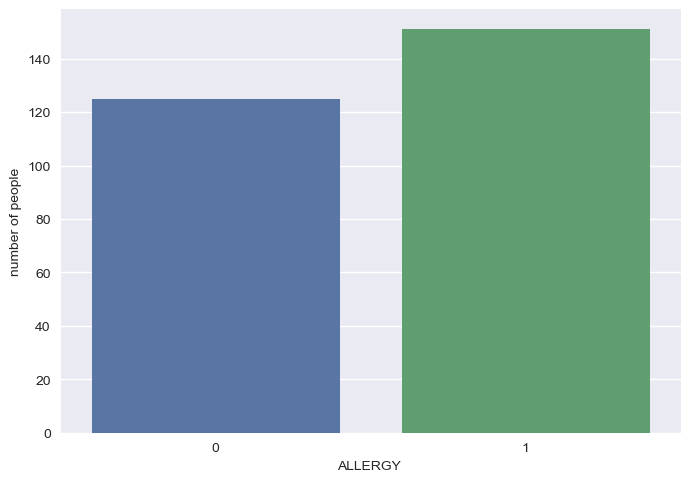

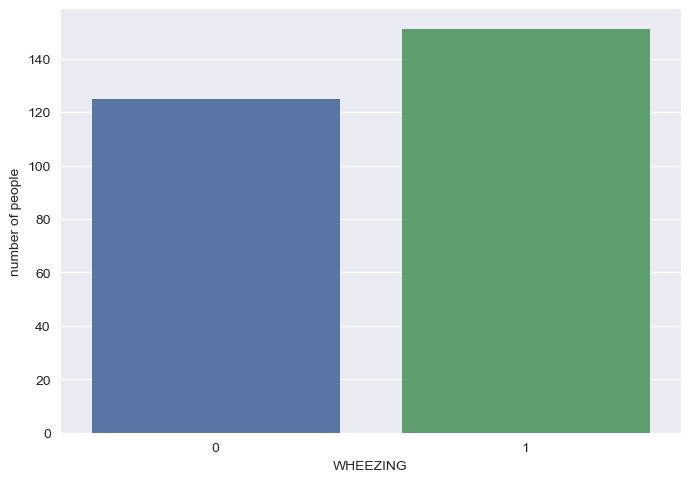

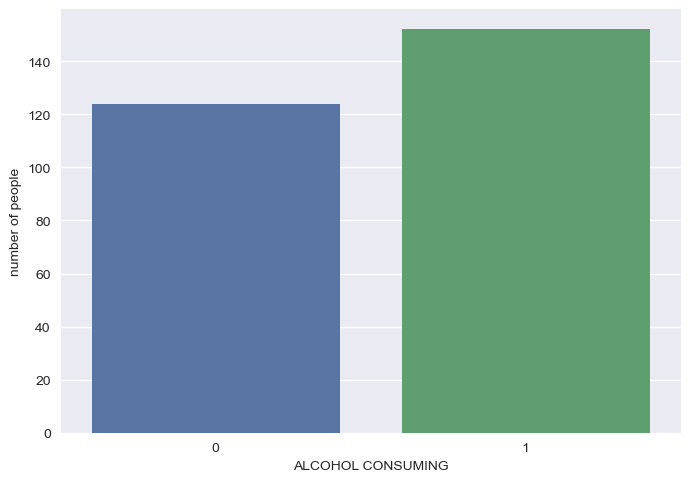

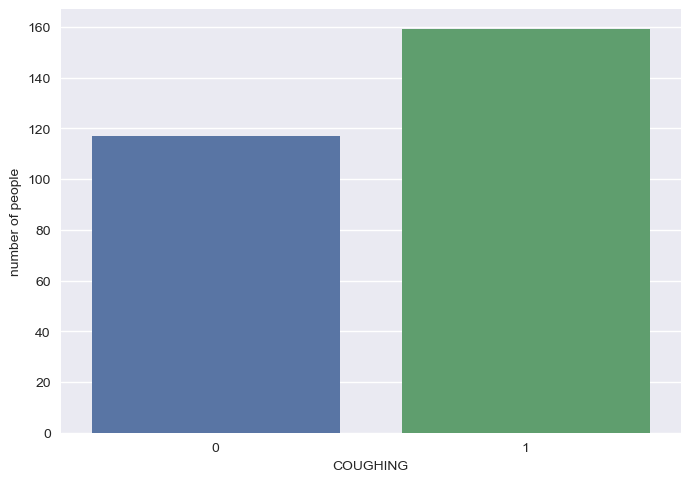

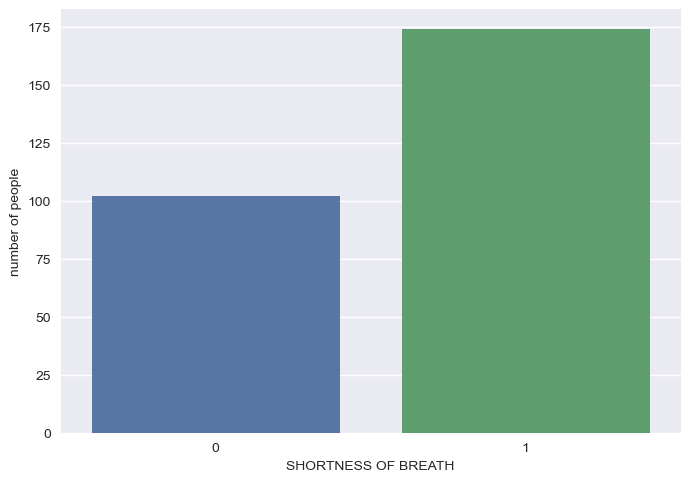

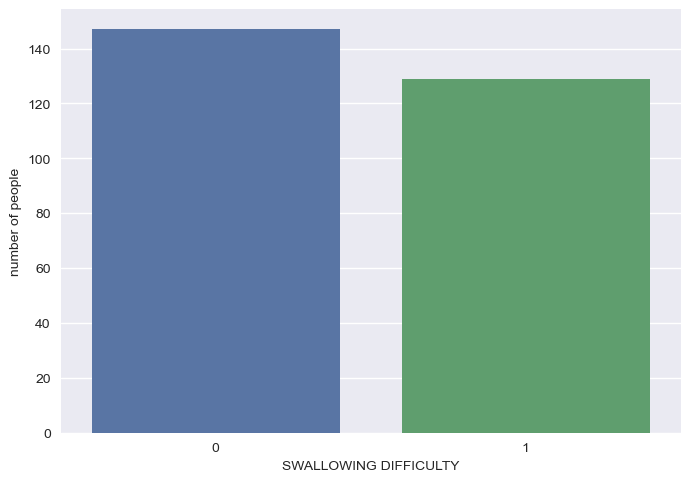

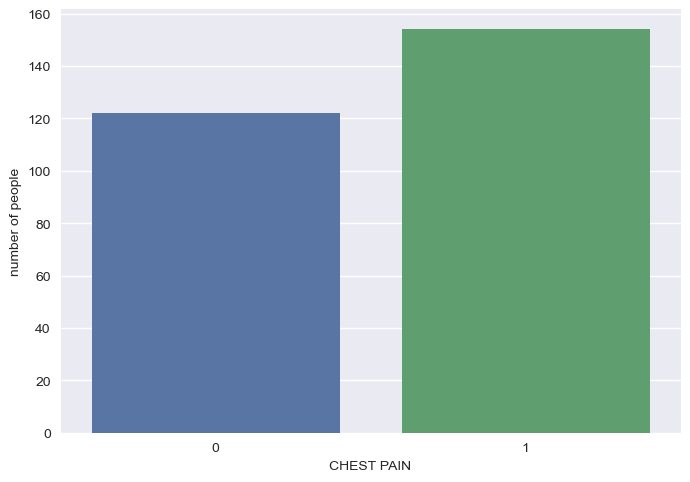

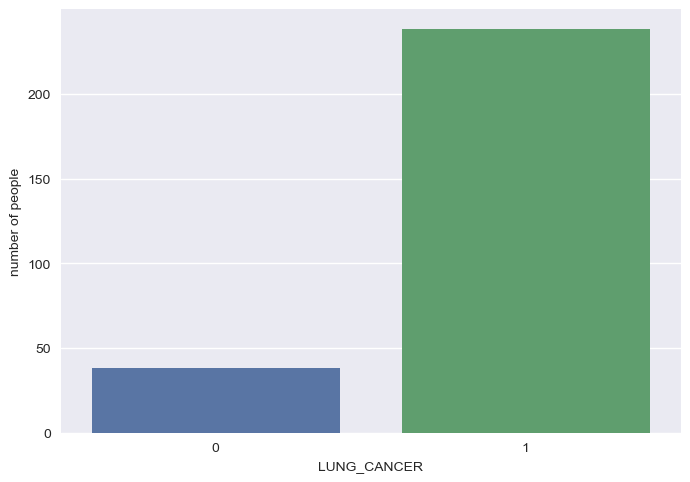

In [35]:
#look at categorical data distribution
for i in df.columns:
    sns.barplot(x=df[i].value_counts().index,y=df[i].value_counts())
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


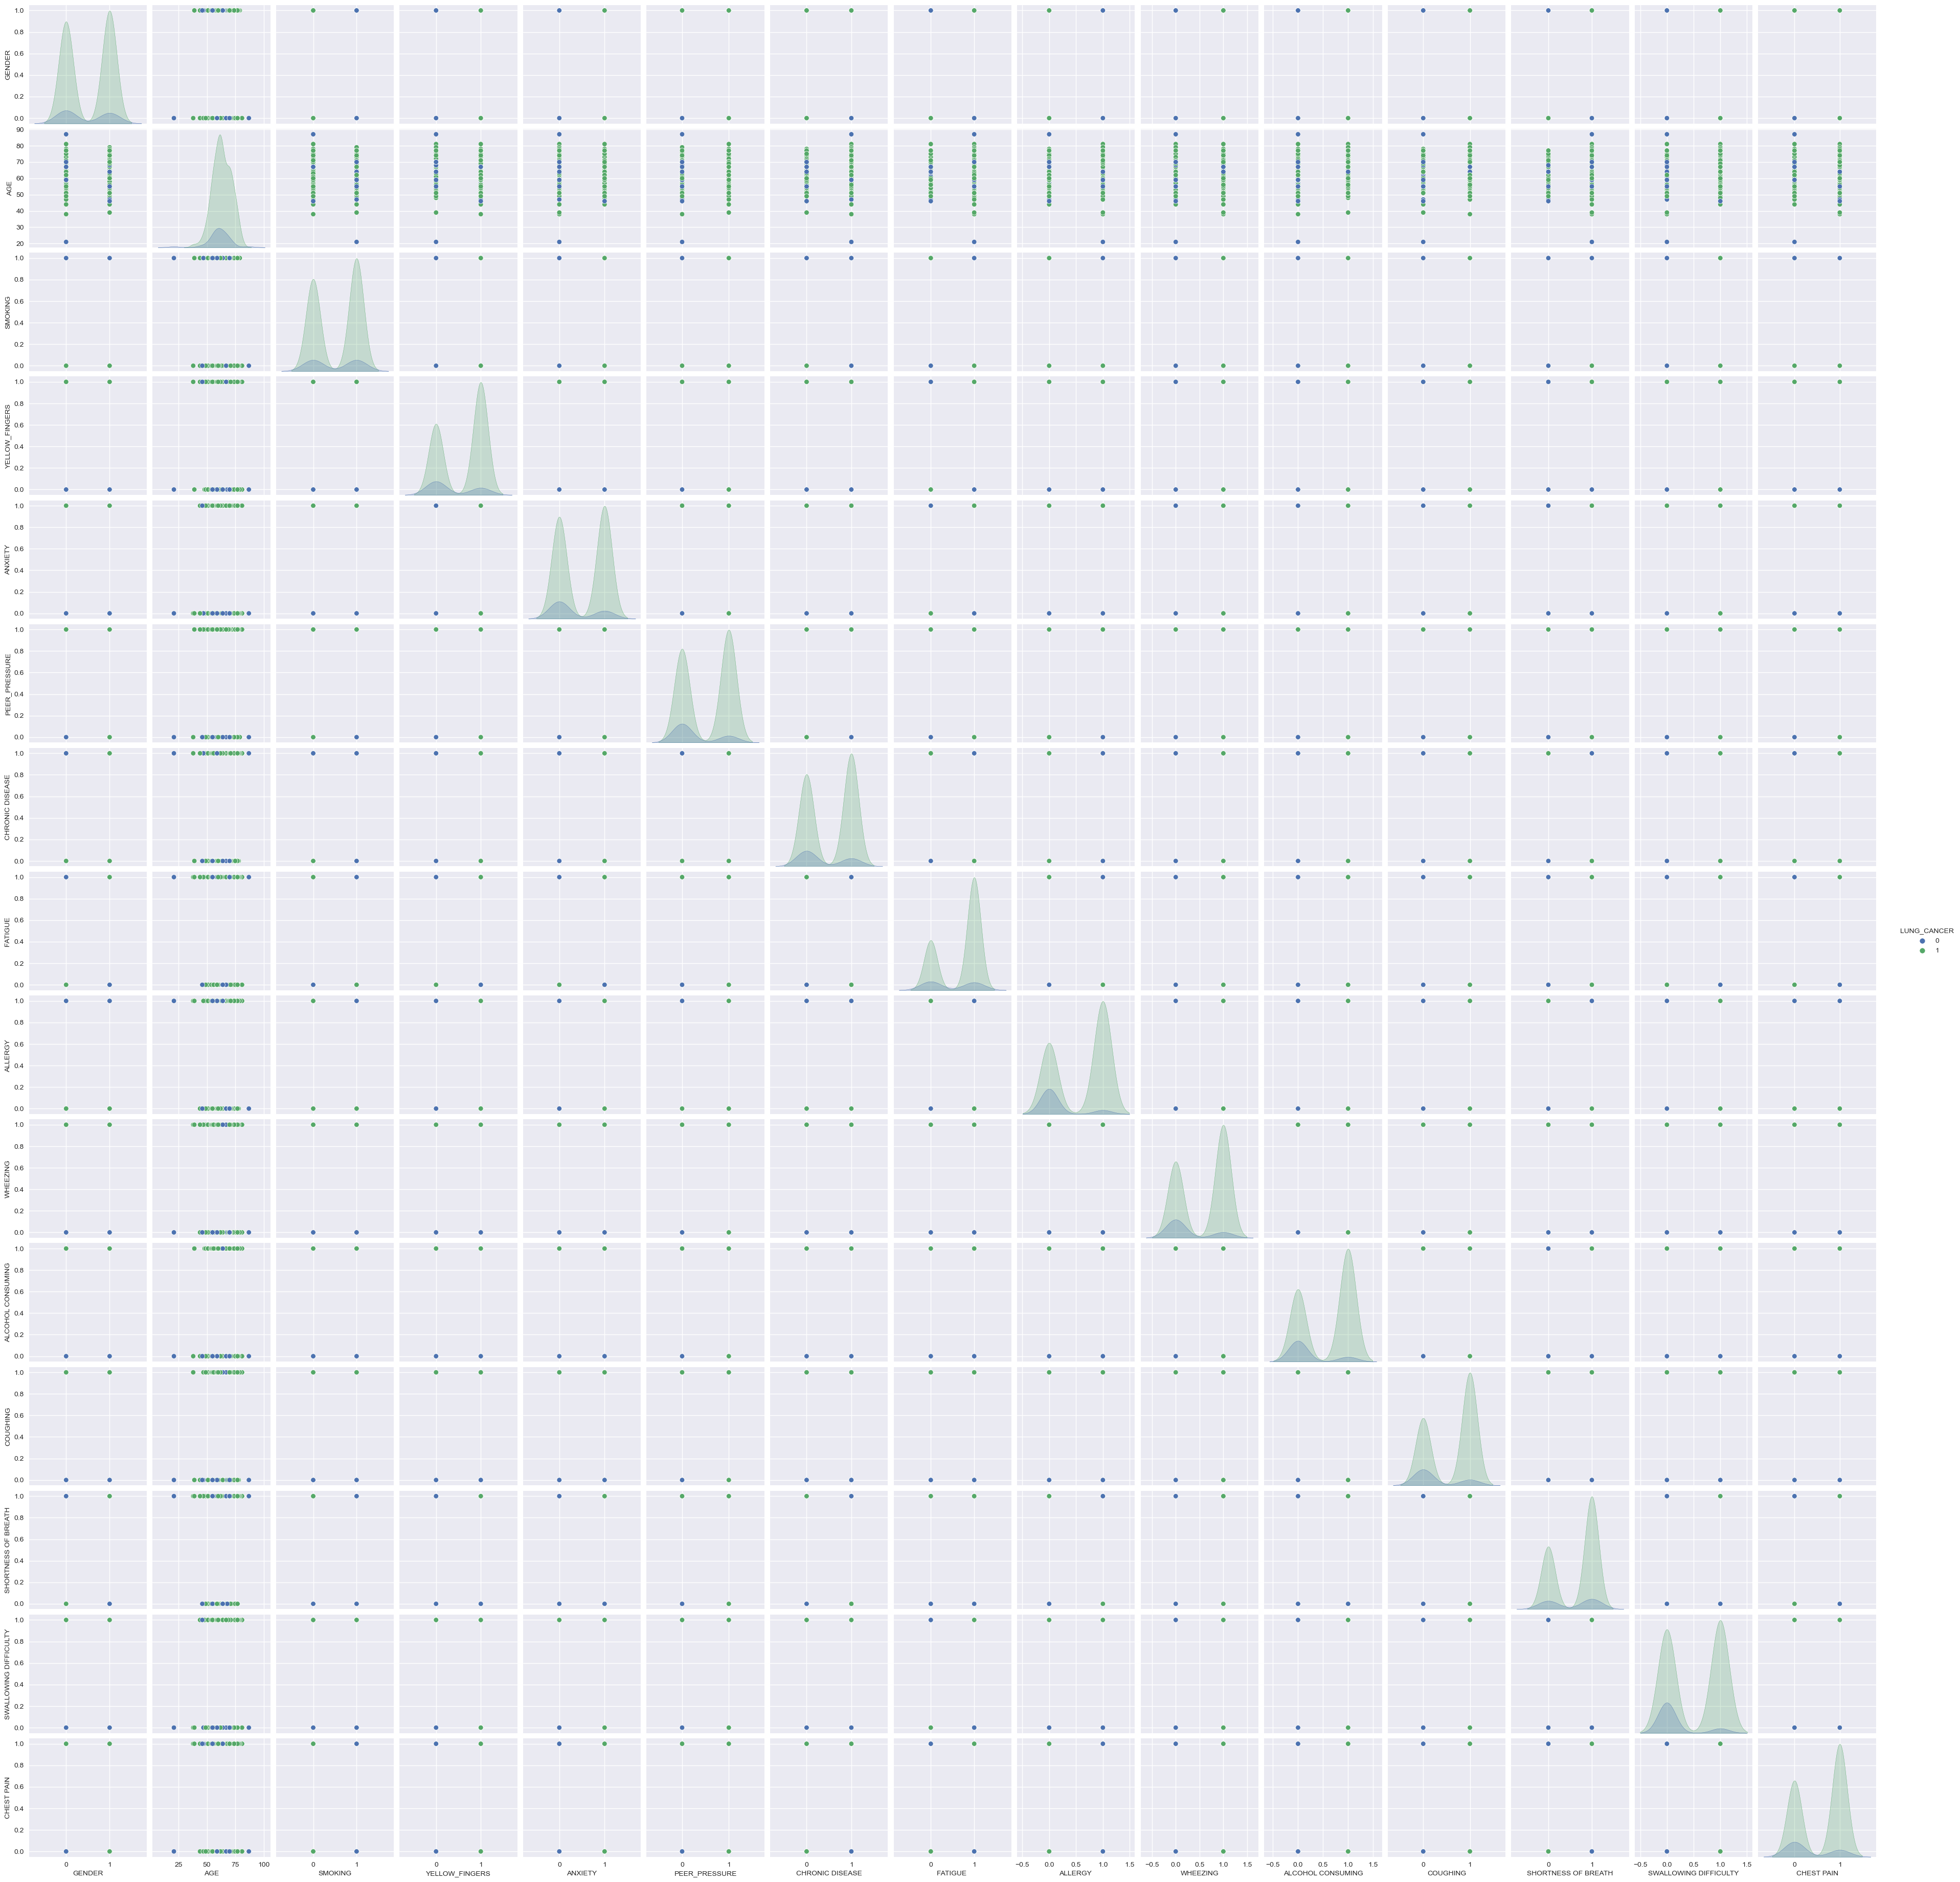

In [36]:
#look at how target is distributed among variables
sns.pairplot(df,hue='LUNG_CANCER')
plt.legend()
plt.show()

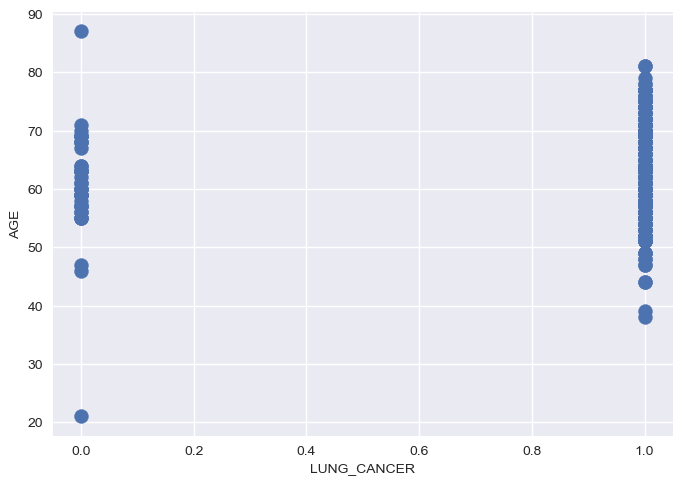

In [37]:
# Draw a scatter plot
df.plot.scatter(x = 'LUNG_CANCER', y = 'AGE', s = 100);

In [38]:
# Groupby multiple columns & multiple aggregations
result = df.groupby('LUNG_CANCER').aggregate({'GENDER':'count','AGE':['min','max']})
print(result)

            GENDER AGE    
             count min max
LUNG_CANCER               
0               38  21  87
1              238  38  81


In [39]:
result = df[['AGE']].aggregate('average')
print(result)

62.90942028985507


In [40]:
result = df[['AGE']].aggregate('var')
print(result)

AGE    70.213584
dtype: float64


In [41]:
result = df[['AGE']].aggregate('std')
print(result)

AGE    8.379355
dtype: float64


In [42]:
# Groupby multiple columns & multiple aggregations
result = df.groupby('LUNG_CANCER').aggregate({'LUNG_CANCER':'count','SMOKING':['min','max']})
print(result)#count()

            LUNG_CANCER SMOKING    
                  count     min max
LUNG_CANCER                        
0                    38       0   1
1                   238       0   1


In [43]:
result = df[['SMOKING']].aggregate('std')
print(result)

SMOKING    0.499011
dtype: float64


In [44]:
result = df[['SMOKING']].aggregate('count')
print(result)

SMOKING    276
dtype: int64


In [45]:
#Splitting the data into training and test datasets
#Here, we are trying to predict whether the patient has Lung Cancer or not using the given data. 
#Hence, LUNG_CANCER will be the y label and rest of the data will be the X or the input data.
# X data
X = df.drop("LUNG_CANCER", axis=1)
X.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        0               1        1              0   
1       1   74        1               0        0              0   
2       0   59        0               0        0              1   
3       1   63        1               1        1              0   
4       0   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0         1         0         1                  1         1   
1                1         1         1         0                  0         0   
2                0         1         0         1                  0         1   
3                0         0         0         0                  1         0   
4                0         0         0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
0                    1                      1           1  
1                    1                      1           1  
2                    1                      0           1  
3                    0                      1           1  
4                    1                      0           0

In [46]:
# y data
y = df["LUNG_CANCER"]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

In [47]:
# Adding randomized samples to the data as the data is imbalanced

from imblearn.over_sampling import RandomOverSampler

over_samp =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = over_samp.fit_resample(X, y)
X_train_res.shape, y_train_res.shape

((476, 15), (476,))

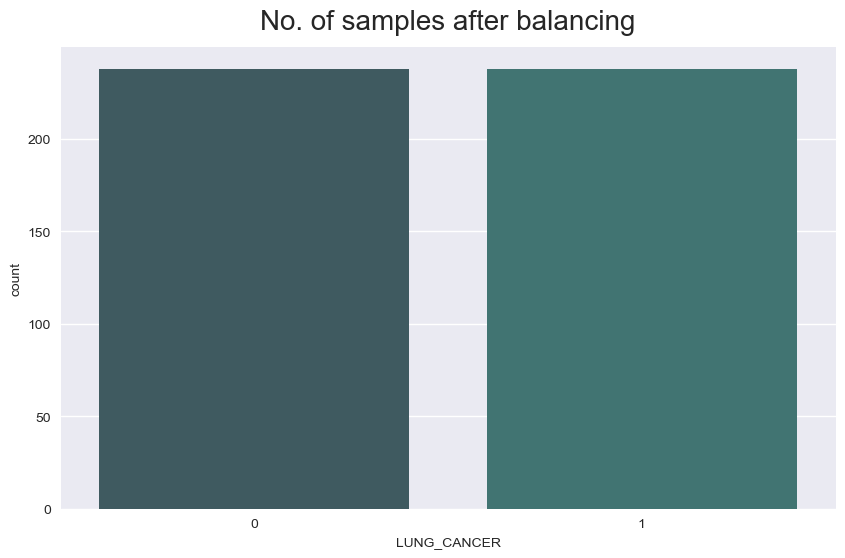

In [48]:
plt.style.use("seaborn")
plt.figure(figsize=(10,6))
plt.title("No. of samples after balancing", fontsize=20, y=1.02)
sns.countplot(x = y_train_res, palette=pal)
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.2, random_state = 42)

In [50]:
len(X_train), len(X_test)

(380, 96)

In [51]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

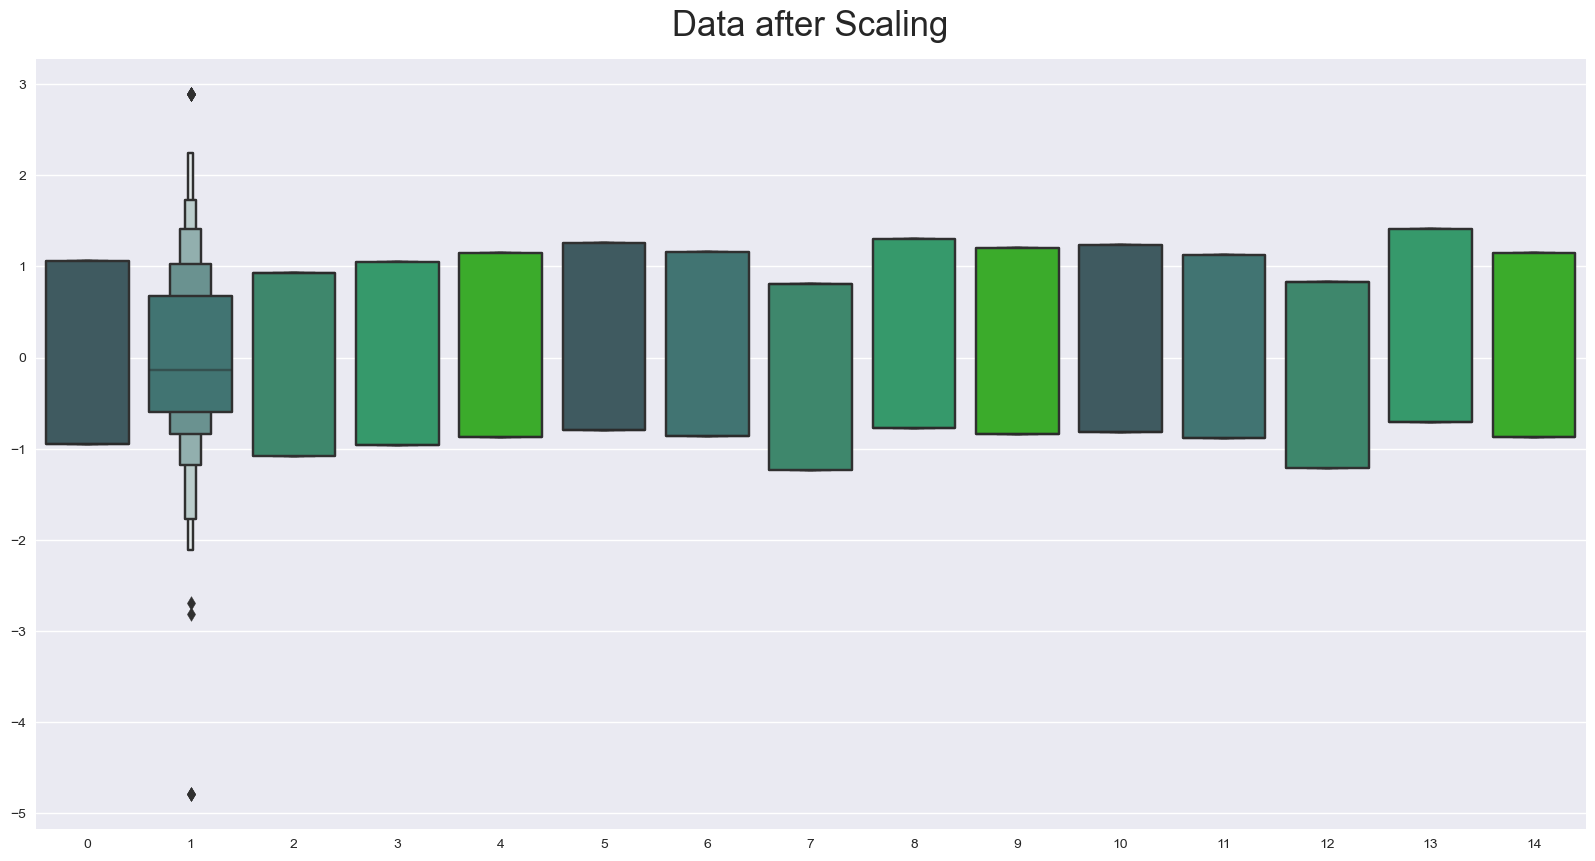

In [52]:
plt.figure(figsize=(20,10))
plt.title("Data after Scaling", fontsize=25, y=1.02)
sns.boxenplot(data = X_train, palette = pal)
plt.show()

In [53]:
#Linear Regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
LinearRegressionScore = lr.score(X_test,y_test)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)

Accuracy obtained by Linear Regression model: 63.01584101767499


In [55]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 96.875


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


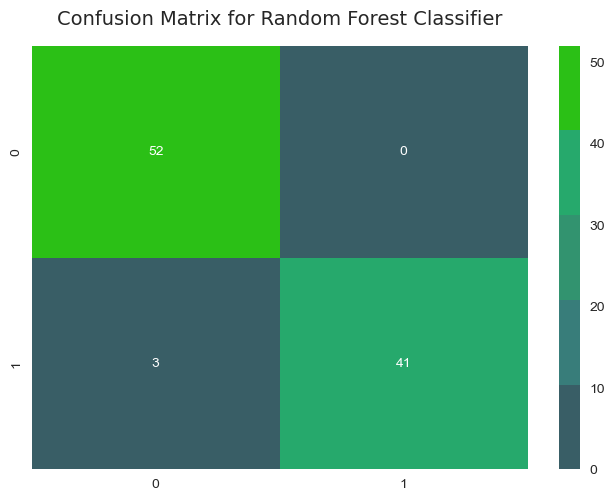

In [57]:
# Confusion Matrix of Random Forest Classifier
from sklearn.metrics import confusion_matrix, classification_report

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [58]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.93      0.96        44

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96



In [59]:
#K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [60]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 94.79166666666666


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


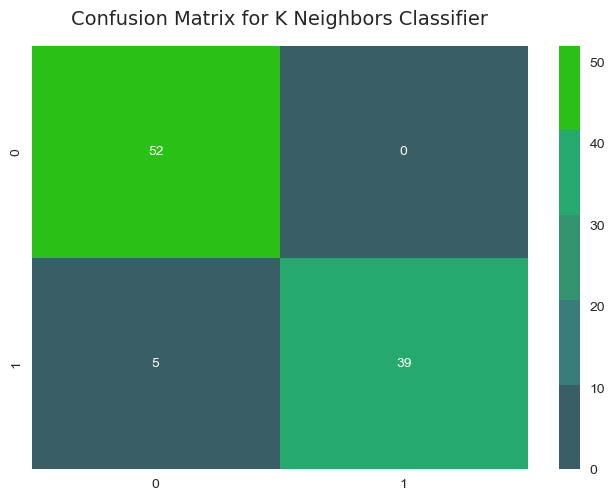

In [61]:
y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [62]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.89      0.94        44

    accuracy                           0.95        96
   macro avg       0.96      0.94      0.95        96
weighted avg       0.95      0.95      0.95        96



In [63]:
#Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 96.875


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


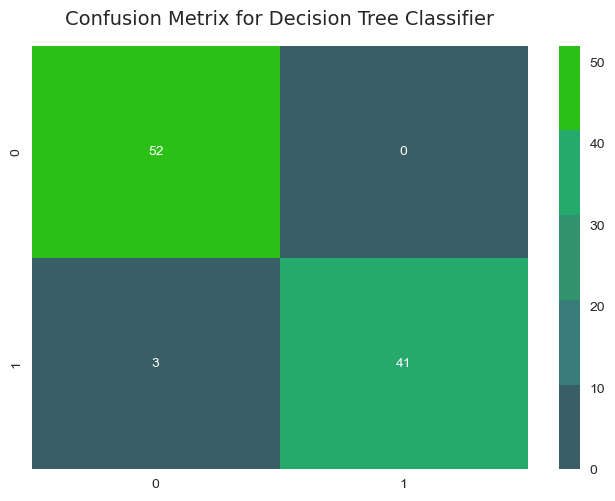

In [65]:
y_pred_dtc = dtc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Metrix for Decision Tree Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [66]:
print(metrics.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.93      0.96        44

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96



In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [68]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 96.875


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


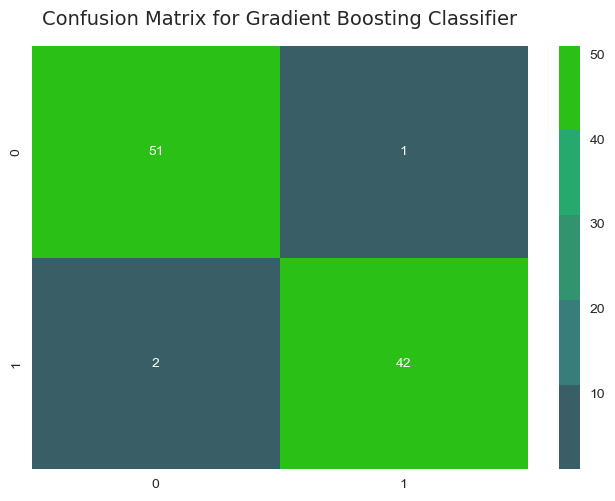

In [69]:
y_pred_gb = gb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [70]:
print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.98      0.95      0.97        44

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96



In [71]:
#XGB Classifier 
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [72]:
XGBClassifierScore = xgb.score(X_test,y_test)
print("Accuracy obtained by XGB Classifier model:",XGBClassifierScore*100)

Accuracy obtained by XGB Classifier model: 96.875


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


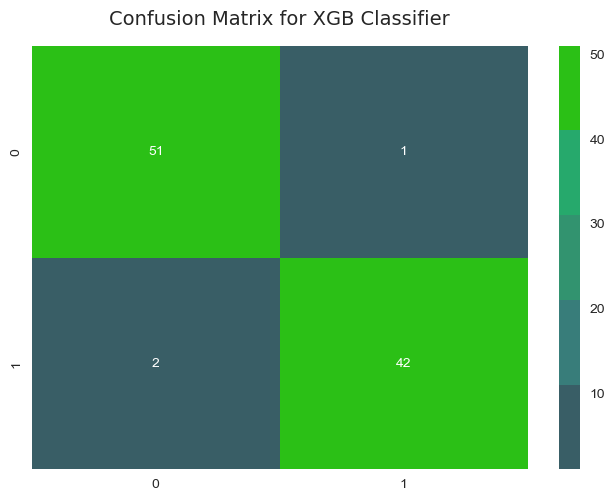

In [73]:
y_pred_xgb = xgb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Matrix for XGB Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [74]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.98      0.95      0.97        44

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96



findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


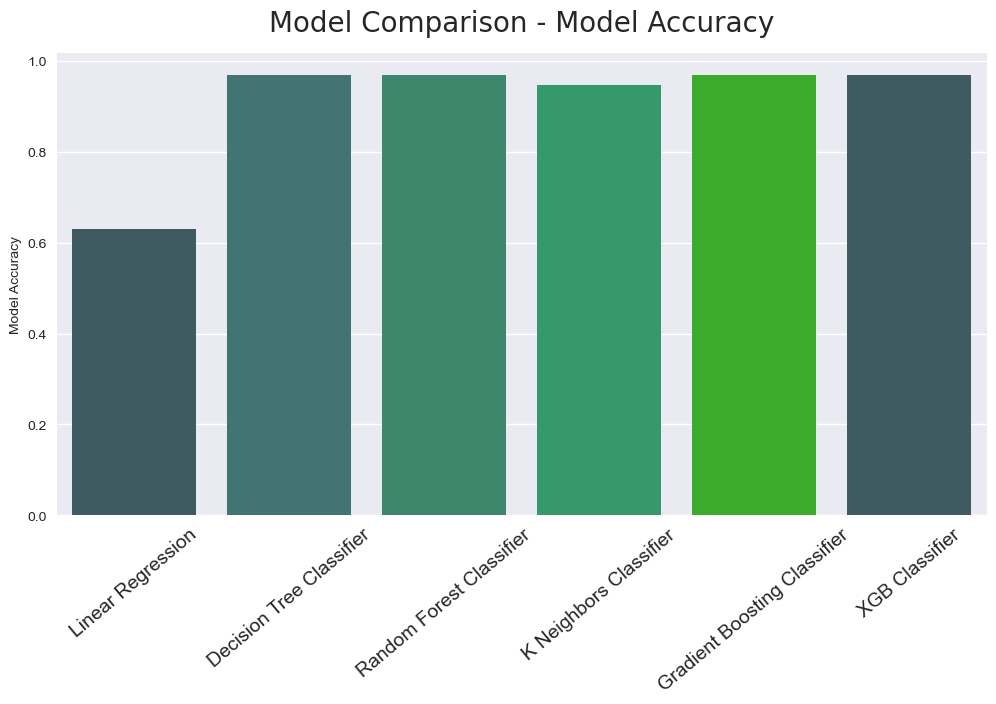

In [75]:
plt.style.use("seaborn")

x = ["Linear Regression", 
     "Decision Tree Classifier", 
     "Random Forest Classifier", 
     "K Neighbors Classifier",  
     "Gradient Boosting Classifier",
     "XGB Classifier"]

y = [LinearRegressionScore, 
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     KNeighborsClassifierScore,  
     GradientBoostingClassifierScore, 
     XGBClassifierScore]

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=x,y=y, palette=pal);
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40, fontsize=14)
plt.title("Model Comparison - Model Accuracy", fontsize=20, fontname="Helvetica", y=1.03)
plt.show()